# Tutorial 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/shubhvjain/coregtor/blob/release/docs/tutorial1.ipynb) 

In this tutorial we demonstrate the use of the `CoRegTor` tool to find transcription co regulators for a gene from gene expression data.

## Objective

The aim of this tutorial is to find potential co-regulators of the gene [GFAP](https://www.ncbi.nlm.nih.gov/gene/2670) by analyzing tissue gene expression data for Frontal cortex in adult brain. 

## Step 1 : Install and import the `CoRegTor` package and other dependencies 

Using pip, `pip install coregtor` .

Or `poetry install coregtor` to add the package as a dependency in your project

In [1]:
# Install coregtor if not already installed, then import it
try:
    import coregtor
    import coregtor.utils as ut
except ImportError:
    %pip install coregtor
    import coregtor

# Additional imports
from pathlib import Path
import pandas as pd

## Step 2 : Get data and load it

Let's gather all the data we require:
- Gene Expression data `ge_brain.gct`. This file contains tissue gene expression data for the Frontal Cortex (BA9) in an adult brain. The data is downloaded from the [GTEx portal](https://www.gtexportal.org/home/downloads/adult-gtex/bulk_tissue_expression)
- List of transcription factors `human_tf.txt` : This file was downloaded from [aertslab.org](https://resources.aertslab.org/cistarget/tf_lists/)


We load this data in dataframes. Now we are ready to use CoRegTor!

In [2]:
base_path = Path("docs/temp") # UPDATE THIS
data_file_path = Path(base_path/"brain_ge.gct") # UPDATE THIS 
tf_file_path = Path(base_path/"human_tf.txt") # UPDATE THIS
target_gene_name = "GFAP" # the gene we are interested in 

# load data 

ge_data = ut.exp.read_GE_data(file_path=data_file_path) # this is just a utility method you dont have to use this if you already have you gene expression data ready in a dataframe
tf_data = pd.read_csv(tf_file_path, names=["gene_name"], header=None)

In [3]:
ge_data

gene_name,DDX11L1,WASH7P,MIR6859-1,MIR1302-2HG,FAM138A,OR4G4P,OR4G11P,OR4F5,ENSG00000238009,CICP27,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
sample_name,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0011-R10b-SM-GI4VE,0.000000,3.57928,0.0,0.093825,0.000000,0.000000,0.028731,0.046554,0.039501,0.058675,...,49762.2,1.177570,2.754330,0.000000,7311.39,4788.56,6.47666,28676.5,3.077750,1.19489
GTEX-111FC-0011-R10a-SM-GIN8G,0.000000,2.32926,0.0,0.025333,0.000000,0.052233,0.031030,0.016759,0.000000,0.031684,...,44692.0,0.953824,0.000000,1.544930,6831.00,5164.36,6.67677,26950.9,1.661970,3.54879
GTEX-117XS-0011-R10b-SM-GIN8Z,0.000000,4.79425,0.0,0.000000,0.046843,0.067977,0.020191,0.043622,0.013880,0.032987,...,39249.9,0.827551,0.967814,1.206360,5603.53,3585.51,6.20663,20794.9,0.432584,2.93902
GTEX-1192W-0011-R10b-SM-GHWOF,0.000000,3.83774,0.0,0.032159,0.045693,0.000000,0.039392,0.053189,0.013539,0.000000,...,50750.5,1.614480,2.832190,1.176750,9433.33,7697.90,12.51220,23405.4,1.265900,3.68601
GTEX-1192X-0011-R10a-SM-DO941,0.040388,1.47233,0.0,0.040318,0.000000,0.000000,0.049385,0.040010,0.050922,0.000000,...,31566.9,2.024070,0.591784,0.983528,4424.64,3568.41,4.55416,14051.5,0.529019,1.54038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZVZQ-0011-R10b-SM-51MRT,0.017553,1.91964,0.0,0.070089,0.000000,0.180647,0.064389,0.092738,0.044262,0.043831,...,44939.6,3.078850,1.543150,2.137230,7019.94,6874.29,16.71380,24296.2,1.379490,2.23152
GTEX-ZXG5-0011-R10a-SM-57WDD,0.000000,1.07536,0.0,0.036646,0.000000,0.000000,0.044887,0.084853,0.000000,0.000000,...,62226.7,2.759570,1.613650,4.469730,11407.90,11061.80,15.17770,38732.2,1.442500,1.86677
GTEX-ZYFD-0011-R10a-SM-GPI91,0.000000,2.71020,0.0,0.000000,0.000000,0.000000,0.037432,0.000000,0.000000,0.030577,...,43740.3,0.000000,2.691290,0.745473,6574.39,5241.85,9.20498,24934.3,0.000000,1.55672


In [4]:
tf_data

,gene_name
0,ZNF354C
1,KLF12
2,ZNF143
3,ZIC2
4,ZNF274
...,...
1887,ZNF826P
1888,ZNF827
1889,ZNF831
1890,ZRSR2


## Step 3 : Create Ensemble model

The first step in the process is to generate a random forest ensemble model using the gene expression data that predicts the expression value of the gene "GFAP" based on all other genes. 

Since we are interested in identifying potential transcription co regulators, we filter the data to include only transcription factors. We use the `create_model_input` function for filtering and preparing the input for training. It takes a dataframe  `t_factors` which should have a column `gene_name` listing the transcription factors to consider. The function outputs a tuple containing 2 data frames: X with the feature genes and Y with the target gene. These can then be passed to the `generate_model` function. 

In [5]:
# first generate the training input for the model
X,Y = coregtor.create_model_input(ge_data,target_gene_name,tf_data)

# use the training data to create a model
model = coregtor.create_model(X,Y,"rf",{"n_jobs":8})

In [6]:
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Step 4 : Generating tree paths 

The genes on the root node are important. These also serve as potential regulators in other tree based GRN inference methods. 

Forest based ensemble methods contains multiple decision tress. We want to analyze the structure of the trees in the model. 

For each tree, there exists multiple root to leaf paths. We first enumerate all the paths in all the trees in the model. 

In [7]:
all_paths = coregtor.tree_paths(model,X,Y)

In [8]:
all_paths

,tree,source,target,path_length,node1,node2,node3,node4,node5,node6,...,node9,node10,node11,node12,node13,node14,node15,node16,node17,node18
0,0,HMBOX1,GFAP,11,YBX1,SP110,GATA2,DBX2,VENTX,DBX2,...,ZNF284,KLF3,None,None,None,None,None,None,None,None
1,0,HMBOX1,GFAP,13,YBX1,SP110,GATA2,DBX2,VENTX,DBX2,...,RBPJ,EGR3,KLF6,ZBTB41,None,None,None,None,None,None
2,0,HMBOX1,GFAP,11,YBX1,SP110,GATA2,DBX2,VENTX,DBX2,...,VENTX,ADARB1,None,None,None,None,None,None,None,None
3,0,HMBOX1,GFAP,9,YBX1,SP110,ZNF653,VAX2,SOX2,HOXA4,...,None,None,None,None,None,None,None,None,None,None
4,0,HMBOX1,GFAP,9,YBX1,SP110,ZNF653,VAX2,NKX2-8,ZNF595,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,99,ZNF114,GFAP,6,HDAC1,POU2F1,ZNF345,NFKB2,ZNF16,None,...,None,None,None,None,None,None,None,None,None,None
10973,99,ZNF114,GFAP,9,HDAC1,DLX1,LBX2,DMRT3,HAND1,PAX5,...,None,None,None,None,None,None,None,None,None,None
10974,99,ZNF114,GFAP,7,HDAC1,DLX1,LBX2,TET1,ZFP57,SOHLH2,...,None,None,None,None,None,None,None,None,None,None
10975,99,ZNF114,GFAP,6,HDAC1,POU2F1,ZNF345,NFKB2,MSGN1,None,...,None,None,None,None,None,None,None,None,None,None


## Step 5 : Generating a set of common sub paths (or the `context`) for all root nodes 

In the table of paths above, we observe many unique genes appear as root nodes. Since we train the decision trees to predict the same target gene, the leaf nodes for all paths are the same. 

We can thus consider these paths as potential regulatory links, where genes at the root regulates the target. All the genes at the root become potential regulators or the target. However, note that  there are multiple intermediate nodes between the root and the target. Comparing these 


We consider the root nodes as potential regulators of the target gene and to find if they are co regulators, we compare how similar the intermediate nodes are in between 2 unique root nodes. 




In [9]:
pathset = coregtor.create_context(all_paths)

In [10]:
pathset.keys()

dict_keys(['HMBOX1', 'MEIS1', 'NMRAL1', 'ZNF18', 'NFYB', 'HCLS1', 'IRF9', 'DPRX', 'ANXA1', 'YBX1', 'ZNF485', 'ALX3', 'TBX19', 'TAGLN2', 'ZNF768', 'PHF21A', 'SP110', 'ATOH8', 'FOXB2', 'BRCA1', 'ID1', 'ZSCAN16', 'MXI1', 'EEF1D', 'CXXC1', 'ZNF846', 'ZNF624', 'AIRE', 'FOXO4', 'ZNF577', 'NKX6-2', 'FEZ1', 'ZNF837', 'ZNF114', 'HNRNPUL1', 'BCL6', 'ZBTB17', 'ZNF652', 'ZNF692', 'HDAC1'])

## Step 6 : Comparing context of all root nodes with each other

similarity 

In [11]:
# transforming the context into a more comparable representation 
gf_histogram = coregtor.transform_context(pathset,method="gene_frequency")

In [12]:
gf_histogram

,SP110,GATA2,DBX2,VENTX,ETS1,ZFP64,ZNF284,OLIG2,ZBTB20,RBPJ,...,ZFP30,AGMAT,ATF2,KLF14,ZBTB41,ZNF773,SETDB1,DBX1,PHTF1,ZNF789
HMBOX1,647,55,79,58,7,1,1,26,26,5,...,0,0,0,0,0,0,0,0,0,0
MEIS1,0,0,0,0,0,0,0,0,5,2,...,0,0,0,0,0,0,0,0,0,0
NMRAL1,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZNF18,18,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
NFYB,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HCLS1,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRF9,0,0,3,3,0,0,1,0,8,1,...,0,0,0,0,0,0,0,0,0,0
DPRX,135,0,0,54,3,2,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
ANXA1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YBX1,141,27,22,24,3,0,2,0,17,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
sim_matrix = coregtor.compare_context(gf_histogram,"cosine")

In [22]:
sim_matrix.to_csv("sample_sim.csv",index=False)

## Step 7 : Interactive generation of co-regulating gene clusters

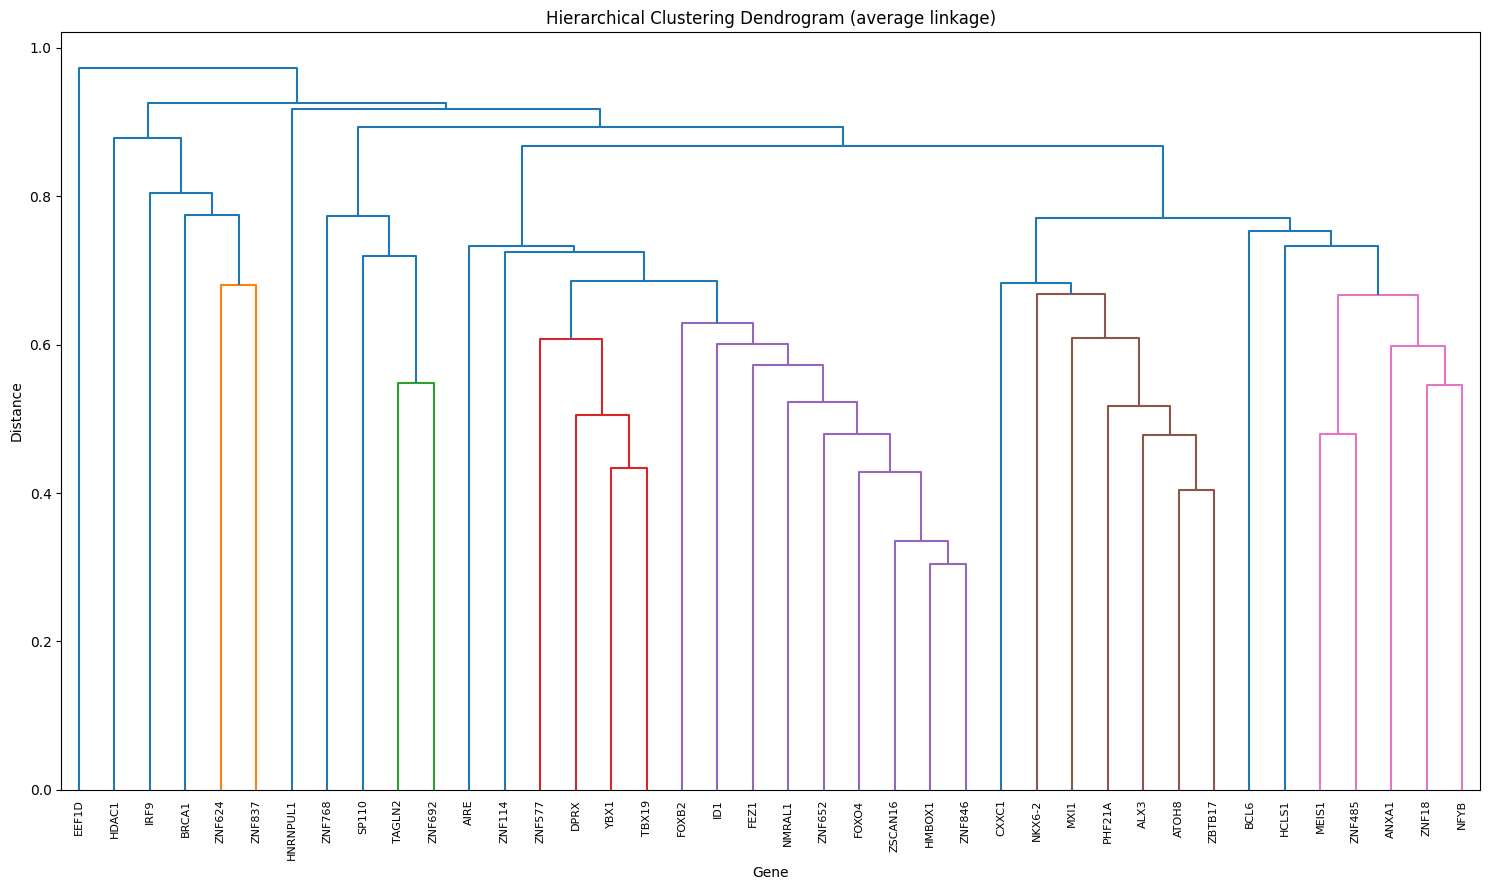

(<Figure size 1500x900 with 1 Axes>,
 <Axes: title={'center': 'Hierarchical Clustering Dendrogram (average linkage)'}, xlabel='Gene', ylabel='Distance'>,
 array([[ 0.        , 25.        ,  0.30382494,  2.        ],
        [21.        , 40.        ,  0.33554309,  3.        ],
        [17.        , 36.        ,  0.40435524,  2.        ],
        [28.        , 41.        ,  0.42812026,  4.        ],
        [ 9.        , 12.        ,  0.43370955,  2.        ],
        [11.        , 42.        ,  0.47806197,  3.        ],
        [ 1.        , 10.        ,  0.47909859,  2.        ],
        [37.        , 43.        ,  0.4797432 ,  5.        ],
        [ 7.        , 44.        ,  0.50478485,  3.        ],
        [15.        , 45.        ,  0.51685424,  4.        ],
        [ 2.        , 47.        ,  0.52217979,  6.        ],
        [ 3.        ,  4.        ,  0.54517594,  2.        ],
        [13.        , 38.        ,  0.54869611,  2.        ],
        [31.        , 50.        ,  0.57

In [15]:
# Dendrogram 
ut.plot.dendrogram(sim_matrix)

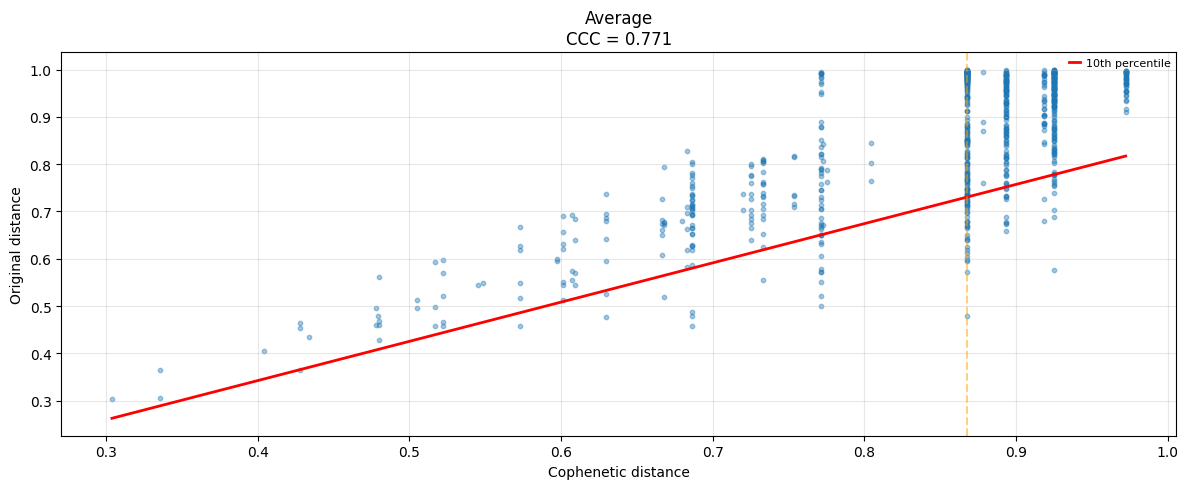

(<Figure size 1200x500 with 1 Axes>,
 [<Axes: title={'center': 'Average\nCCC = 0.771'}, xlabel='Cophenetic distance', ylabel='Original distance'>],
 {'average': np.float64(0.7708075282302238)},
 np.float64(0.7304958606121552))

In [16]:
# Cophonetic distance 
ut.plot.cophenetic(sim_matrix,methods=["average"])

In [17]:
# generate results

results = coregtor.identify_coregulators(sim_matrix,target_gene=target_gene_name,distance_threshold=0.70)

ValueError: Exactly one of n_clusters and distance_threshold has to be set, and the other needs to be None.

In [47]:
results

((AgglomerativeClustering(distance_threshold=0.7, linkage='average',
                          metric='precomputed', n_clusters=None),
    target_gene                                       gene_cluster  n_genes  \
  0        GFAP  BCL6,DPRX,FOXB2,HMBOX1,IRF9,NR5A2,PHF21A,PRRX1...       16   
  1        GFAP  ALX3,CXXC1,HCLS1,HDAC1,NEUROG2,NKX6-2,NMRAL1,P...       12   
  2        GFAP                              PPP2R3B,ZNF536,ZNF775        3   
  3        GFAP                                         BBX,ZNF814        2   
  4        GFAP                                      UBXN1,ZKSCAN1        2   
  
     cluster_id  
  0           0  
  1           3  
  2           2  
  3           1  
  4           4  ),
 None)

In [43]:
clusters

(AgglomerativeClustering(distance_threshold=0.7, linkage='average',
                         metric='precomputed', n_clusters=None),
   target_gene                                       gene_cluster  n_genes  \
 0        GFAP  BCL6,DPRX,FOXB2,HMBOX1,IRF9,NR5A2,PHF21A,PRRX1...       16   
 1        GFAP  ALX3,CXXC1,HCLS1,HDAC1,NEUROG2,NKX6-2,NMRAL1,P...       12   
 2        GFAP                              PPP2R3B,ZNF536,ZNF775        3   
 3        GFAP                                         BBX,ZNF814        2   
 4        GFAP                                      UBXN1,ZKSCAN1        2   
 
    cluster_id  
 0           0  
 1           3  
 2           2  
 3           1  
 4           4  )

In [44]:
import importlib
importlib.reload(coregtor)

<module 'coregtor' from '/Users/svj/projects/coregtor/src/coregtor/__init__.py'>

In [35]:
results1 = results1[results1["n_genes"]<10]
results1

TypeError: tuple indices must be integers or slices, not str

In [26]:
results2,_ = coregtor.identify_coregulators(sim_matrix,target_gene=target_gene_name,distance_threshold=0.75)
results2

,target_gene,gene_cluster,n_genes,cluster_id
0,GFAP,"ALX3,CREB3L2,DPRX,FOXB2,HCLS1,HMBOX1,ID1,IKZF2...",19,0
1,GFAP,"CLK1,IRF9,NKX6-2,PIR,RAD21,TBX19,ZNF768,ZNF837",8,3
2,GFAP,"POU2AF1,SMC3,ZRSR2",3,2
3,GFAP,"MAFK,ZNF577",2,1
4,GFAP,"BCL6,MXI1",2,4
5,GFAP,"FEZ1,HTATIP2",2,5


In [27]:
results2 = results2[results2["n_genes"]<10]
results2

,target_gene,gene_cluster,n_genes,cluster_id
1,GFAP,"CLK1,IRF9,NKX6-2,PIR,RAD21,TBX19,ZNF768,ZNF837",8,3
2,GFAP,"POU2AF1,SMC3,ZRSR2",3,2
3,GFAP,"MAFK,ZNF577",2,1
4,GFAP,"BCL6,MXI1",2,4
5,GFAP,"FEZ1,HTATIP2",2,5


# Validation of results 